In [80]:
import numpy as np
import gymnasium as gym
from matplotlib import pyplot as plt
import keras
from collections import deque
import random
import pandas as pd
import torch

In [118]:
class DQlearn:
    
    def __init__(self, 
                 alpha,
                 gamma,
                 layers):
        self.env = gym.make('CartPole-v1')
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = 1
        self.min_epsilon = 0.01
        self.decr_epsilon = 0.99
        self.model = self.get_model(layers)
        self.memory = deque(maxlen=1000)
        
    def get_model(self, layers):
        model = torch.nn.Sequential()
        model.add(keras.Input(shape=(self.env.observation_space.shape[0],)))
        for n, func in layers:
            model.add(keras.layers.Dense(n, activation = func))
        model.add(keras.layers.Dense(self.env.action_space.n, activation='linear'))
        model.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=self.alpha))
        return model

    def act(self, states):
        if np.random.random() > self.epsilon:
            return np.argmax(self.model.predict(states, verbose=0)[0])
        return np.random.randint(2)
    
    def train(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for states, action, reward, done, new_states in minibatch:
            label = reward
            if not done:
                label += self.gamma * np.amax(self.model.predict(new_states, verbose=0))
            flabel = self.model.predict(states, verbose=0)
            flabel[0][action] = label
            self.model.fit(states, flabel, epochs=1, verbose=0)
        if self.epsilon > self.min_epsilon:
            self.epsilon *= self.decr_epsilon
    
    def run(self, max_run, batch_size):
        rewards = []
        n=0
        while n < max_run:
            states = self.env.reset()[0].reshape((1,4))
            done = False
            step = 0
            rew = 0
            while step < 200:  
                action = self.act(states)
                obs, r, term, trunc, info= self.env.step(action)

                done = term or trunc
                
                self.memory.append((states, action, r, done, obs.reshape((1,4))))
                states = obs.reshape((1,4))
                rew += r
                step += 1
                if done:
                    rewards.append(rew)
                    print(f'Episode: {n}, reward: {rew}')
                    break
            n += 1
            if len(self.memory) > batch_size:
                self.train(batch_size)
        return rewards

In [120]:
dql_test = DQlearn(0.001, 0.99, [(24,'relu')])
rewards = dql_test.run(50, 64)

Episode: 0, reward: 25.0
Episode: 1, reward: 41.0
Episode: 2, reward: 13.0
Episode: 3, reward: 15.0
Episode: 4, reward: 21.0
Episode: 5, reward: 40.0
Episode: 6, reward: 44.0
Episode: 7, reward: 34.0
Episode: 8, reward: 50.0
Episode: 9, reward: 9.0
Episode: 10, reward: 23.0
Episode: 11, reward: 22.0
Episode: 12, reward: 63.0
Episode: 13, reward: 15.0
Episode: 14, reward: 18.0
Episode: 15, reward: 53.0
Episode: 16, reward: 11.0
Episode: 17, reward: 16.0
Episode: 18, reward: 13.0
Episode: 19, reward: 29.0
Episode: 20, reward: 32.0
Episode: 21, reward: 34.0
Episode: 22, reward: 19.0
Episode: 23, reward: 33.0
Episode: 24, reward: 14.0
Episode: 25, reward: 24.0
Episode: 26, reward: 26.0
Episode: 27, reward: 31.0
Episode: 28, reward: 29.0


KeyboardInterrupt: 

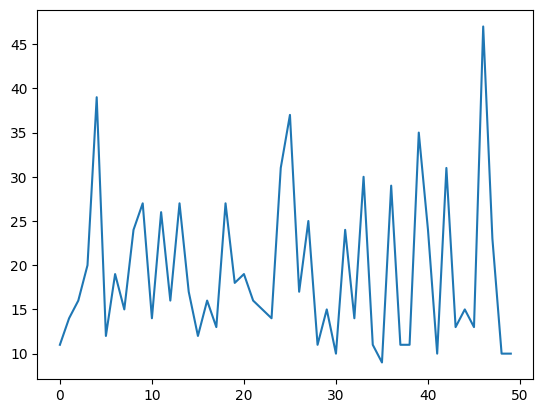

In [78]:
plt.plot(rewards)

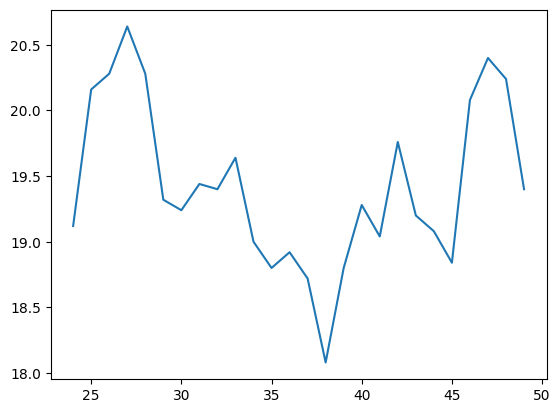

In [84]:
plt.plot(pd.Series(rewards).rolling(25).mean())

In [117]:
dql_test2 = DQlearn(0.001, 0.99, [(64,'relu'), (64,'relu')])
rewards2 = dql_test2.run(100, 32)

Episode: 0, reward: 24.0
Episode: 1, reward: 22.0
Episode: 2, reward: 29.0
Episode: 3, reward: 18.0
Episode: 4, reward: 20.0
Episode: 5, reward: 12.0
Episode: 6, reward: 17.0
Episode: 7, reward: 36.0
Episode: 8, reward: 13.0
Episode: 9, reward: 23.0
Episode: 10, reward: 18.0
Episode: 11, reward: 12.0
Episode: 12, reward: 20.0
Episode: 13, reward: 15.0
Episode: 14, reward: 23.0
Episode: 15, reward: 18.0
Episode: 16, reward: 24.0
Episode: 17, reward: 20.0
Episode: 18, reward: 17.0
Episode: 19, reward: 14.0
Episode: 20, reward: 42.0
Episode: 21, reward: 23.0
Episode: 22, reward: 15.0
Episode: 23, reward: 12.0
Episode: 24, reward: 22.0
Episode: 25, reward: 16.0
Episode: 26, reward: 12.0
Episode: 27, reward: 12.0
Episode: 28, reward: 57.0
Episode: 29, reward: 14.0
Episode: 30, reward: 12.0
Episode: 31, reward: 9.0
Episode: 32, reward: 16.0
Episode: 33, reward: 19.0
Episode: 34, reward: 19.0
Episode: 35, reward: 16.0
Episode: 36, reward: 15.0
Episode: 37, reward: 12.0
Episode: 38, reward: 20

KeyboardInterrupt: 

In [95]:
minibatch = random.sample(dql_test2.memory, 64)

In [106]:
minibatch[0][0]

array([[-0.05493716, -0.9698727 ,  0.13603927,  1.5754459 ]],
      dtype=float32)